 # Push-down Automata

This material on push-down automata was inspired by that developed by Tyler Sorensen in year 2011 when he was my Research Assistant. I rewrote his code to fit the more functional style used in my book, while gratefully acknowledging his work in inspiring my code. I have adapted his examples to my syntax, plus added many of my own.

In [1]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path

from jove.SystemImports       import *
from jove.DotBashers          import *
from jove.TransitionSelectors import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)



# Pushdown Automata (PDA)

## Basic Definitions

Pushdown Automata are structures

  $(Q, Sigma, Gamma, Delta, q0, z0, F)$
  
where

 * $Q$       : Finite non-empty set of states

 * $Sigma$   : Finite non-empty input alphabet

 * $Gamma$   : Finite non-empty stack alphabet (usually subsumes Sigma)

 * $Delta$   : A transition function 

and $Delta$'s signature is
       
$(Q \times (Sigma \cup \{\varepsilon\}) \times (Gamma\cup\{\varepsilon\}) \rightarrow (Q \times Gamma^*)$

## Example

We model Delta as a mapping of this form
             
 (q, a, b) -> { (q1,G1s), (q2,G2s), ... }
             
          where
             a   gets read
             b   gets popped, if non-empty
             Gis gets pushed
             qi  becomes the next state
             
* q0      : Starting state

* z0      : Initial stack's lone contents

            - prevents an "accept by
              empty stack" PDA from accepting as soon as it is 
              switched on

* F       : Finite, possibly empty set of final states

We will define acceptance by final state _or_ empty stack, as will be detailed in this sequel. 

## Instantaneous Description

An instantaneous description (ID) of a PDA is a triple (p, aI, bS). 

Now, ID (p, aI, bS) evolves to an ID (q, I, GS) 

written

   (p, aI, bS) $\vdash$ (q, I, GS)
   
   
if  Delta(p,a,b) contains (q,G)

A PDA accepts by final state if its ID is of the form (p, "", S)
where p in F. 

That is, the input is fully consumed
and control resides within F. Note that S is arbitrary.

A PDA accepts by empty stack if its ID is of the form (p, "", "")
at any point (for any p).

## Design Details of a PDA

To __prevent__ a PDA P whose acceptance is defined via an empty stack
from accepting "as soon as it is turned on", we put in an
initial stack letter denoted by P["z0"].

 * Note that this is only to help-out the user. The user may decide to start with 
 an empty stack, which is fine.
 
 * Our preferred initial stack symbol is "z" (lower-case z). 
 

# Our coding decisions wrt acceptance

In our coding,

* For PDA, we will require there to be an initial stack symbol

* We will permit acceptance either by final state or empty stack (this will be a 
  parameter given to the run_pda function)
  
* We will require that a PDA always pop something from the stack (but allow zero or more things to be pushed). This way ("zero or more"), emptying the stack becomes possible.

* When we encounter an ID for which acceptance has been noted, that ID will still be expanded if there are moves leading out of it.


In [2]:
trSrc

<function jove.TransitionSelectors.trSrc>

Consistency checker(s) for PDA have moved to DotBashers

In [3]:
# Example PDA that recognizes balanced parentheses

P1bp  = { "Q"     : {"s0", "s1", "s2"},
           "Sigma" : {'(',')'},
           "Gamma" : {"(",")",'z'},
           "Delta" : { ('s0','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','(') : { ('s1','((') }, # push (; push (
                       ('s1','(',')') : { ('s1','()') }, # push ); push (
                       ('s1',')','(') : { ('s1','')   }, # push nothing
                       ('s1','','z')  : { ('s2','')   }  # push nothing
                     },
           "q0"    : "s0",
           "z0"    : 'z',
           "F"     : {"s2"}
         }
chk_consistent_pda(P1bp)

In [4]:
# A variant of P1bp with some redundant transitions added (to take the PDA out of a 
P2bp    = { "Q"     : {"s0", "s1", "s2"},
           "Sigma" : {'(',')'},
           "Gamma" : {"(",")","z"},
           "Delta" : { ('s0','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','(') : { ('s1','((') }, # push (; push (
                       ('s1','(',')') : { ('s1','()') }, # push ); push (
                       ('s1',')','(') : { ('s1','')   }, # push nothing
                       ('s1','','z')  : { ('s2','')   },  # push nothing
                       ('s2','','')   : { ('s2','')   }
                     },
           "q0"    : "s0",
           "z0"    : 'z',
           "F"     : {"s2"}
         }

chk_consistent_pda(P2bp)

In [5]:
# A variant of P2bp with some redundant transitions added (to take the PDA out of a 
P3bp    = { "Q"     : {"s0", "s1", "s2","s3"},
           "Sigma" : {'(',')'},
           "Gamma" : {"(",")","z"},
           "Delta" : { ('s0','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','(') : { ('s1','((') }, # push (; push (
                       ('s1','(',')') : { ('s1','()') }, # push ); push (
                       ('s1',')','(') : { ('s1','')   }, # push nothing
                       ('s1','','z')  : { ('s2','')   },  # push nothing
                       ('s2','','')   : { ('s3','')   } # run away to s3
                     },    # still it matters that a fleeting glimpse of
           "q0"    : "s0", # 's2' has been had, with input consumed!
           "z0"    : 'z',  # That is enough for acceptance. Tsk, tsk!
           "F"     : {"s2"}
         }

chk_consistent_pda(P3bp) 

In [6]:
Pev = { "Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1','Z'},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')} },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : { "S3" } }

chk_consistent_pda(Pev)

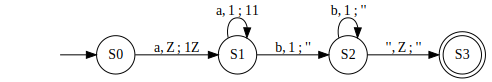

In [7]:
dotObj_pda(Pev)

In [8]:
list(P2bp["Delta"].items())

[(('s0', '(', 'z'), {('s1', '(z')}),
 (('s1', '(', 'z'), {('s1', '(z')}),
 (('s1', '(', '('), {('s1', '((')}),
 (('s1', '(', ')'), {('s1', '()')}),
 (('s1', ')', '('), {('s1', '')}),
 (('s1', '', 'z'), {('s2', '')}),
 (('s2', '', ''), {('s2', '')})]

In [9]:
pdaEdgLab

<function jove.DotBashers.pdaEdgLab>

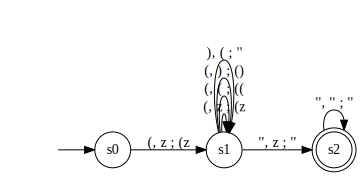

In [10]:
dotObj_pda(P2bp)

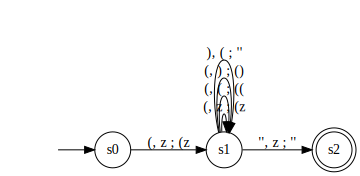

In [11]:
dotObj_pda(P1bp)

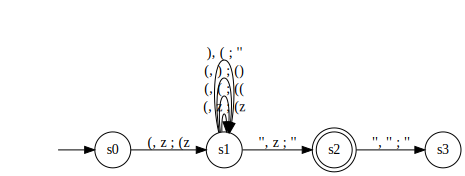

In [12]:
dotObj_pda(P3bp)

# Routines to run PDA 

We now devise a routine to run a PDA according to either the "accept by final state" criterion or "accept by empty stack" criterion. We call these "ACCEPT_F" and "ACCEPT_S" with the default being ACCEPT_F.  The main difference is that the "final" configurations are collected differently.

In [13]:
def explore_pda(inp, P, acceptance = 'ACCEPT_F', chatty=False):
    """A handy routine to print the result of run_pda plus making 
       future extensions to explore run-results.
    """
    chk_consistent_pda(P)
    (term, final, visited) = run_pda(inp, P, acceptance, chatty=chatty)
    if (final == []):
        print("String " + inp + " rejected by your PDA :-(")
        print("Visited states are:")
        print(visited)
    else:
        print("String " + inp + " accepted by your PDA in " + 
               str(len(final)) + " ways :-) ")
        print("Here are the ways: ")
        for fin_path in final:
            (fin, path) = fin_path
            print("Final state ", fin)
            print("Reached as follows:")
            for p in path:
                print("-> ", p)
            print("-> ", fin, ".")

In [14]:
def run_pda(str, P, acceptance = 'ACCEPT_F', chatty=True):
    """Input:  An initial string str.
               A PDA P
               The acceptance criterion (default is "by final state"
               encoded as ACCEPT_F. The alternative is ACCEPT_S
               that stands for "acceptance by empty stack").
               
       Output: (l_term_id_path, l_final_id_path, l_visited_id)
               Thus, an external routine can probe and determine
               * terminal IDs
               * acceptance configurations
               * visited IDs
    """
    chk_consistent_pda(P)
    init_id         = (P["q0"], str, P["z0"]) # Initial ID
    init_l_id_path  = [(init_id, [])]   # [(Initial ID, empty path)]
    l_visited_id    = [] # Nothing visited yet
    
    (l_surv, 
     l_term, 
     l_final) = classify_l_id_path(init_l_id_path, l_visited_id, P, acceptance)
    
    rslt            = h_run_pda(l_id_path       = l_surv,
                                l_term_id_path  = l_term,     
                                l_final_id_path = l_final,  
                                l_visited_id    = l_visited_id,  
                                pda             = P,   
                                acceptance      = acceptance # Acceptance criterion
                               )
    (terminal_id_path, final_id_path, visited_ids) = rslt
    if chatty:
        print("terminal_id_path = ", terminal_id_path) 
        print("final_id_path = ", final_id_path)
        print("visited_ids = ", visited_ids)
    return rslt

In [15]:
def classify_l_id_path(l_id_path, l_visited_id, P, acceptance):
    """Given a list l_id_path of id_path pairs, a list l_visited_id
       of visited IDs, a PDA P, and the acceptance criterion, classify
       the contents of id_path into survivors, terminals, and finals.
    """
    surv_pool  = list(map(survivor_id(l_visited_id, P), l_id_path))
    term_pool  = list(map(term_id(l_visited_id, P), l_id_path))
    final_pool = list(map(final_id(l_visited_id, P, acceptance), l_id_path))
   
    l_surv = list(map(lambda x: x[1],
                      filter(lambda x: x[0]=="surv",
                             surv_pool)))
    l_term = list(map(lambda x: x[1],
                      filter(lambda x: x[0]=="term",
                             term_pool)))
    l_final = list(map(lambda x: x[1],
                       filter(lambda x: x[0]=="final",
                              final_pool))) 
    return (l_surv, l_term, l_final)

In [16]:
def h_run_pda(l_id_path, l_term_id_path, l_final_id_path, l_visited_id, 
              pda, acceptance):
    """Input:  A list of id_path, all of which are surviving i.e. not
               "term" or terminal. This invariant is maintained.
               A list of terminal id_path (terminal in that there is
                 no point pushing on them; stuck or loopy).
               A list of final id_path: whenever we meet the 
               acceptance condition, we record that configuration;
               A list of visited id. This will help determine if
                 terminal or not. Detects looping as well.
               A PDA.
       Output: (l_term_id_path, l_final_id_path, l_visited_id)
               Thus, an external routine can probe and determine
               * terminal IDs
               * acceptance configurations
               * visited IDs
    """
    if l_id_path == []:
        return (l_term_id_path, l_final_id_path, l_visited_id)
    else:
        id_path0    = l_id_path[0]
        (id0,path0) = id_path0     # separate out the id and path
               
        # First, record the current id0 in l_visited_id 
        l_visited_id = [ id0 ] + l_visited_id 
        
        # Then obtain  (ID, path) pairs generated by 
        # taking all possible one-step moves out of id0. 
        # We also record the extension of path0 in each such
        # reached new ID.
        nl_id_path0 = step_pda(id0, path0, pda)

        if nl_id_path0 == []:
            # Nothing gen by firing id0; recurse on rest
            return h_run_pda(l_id_path[1:],
                             l_term_id_path,
                             l_final_id_path,
                             l_visited_id,
                             pda,
                             acceptance)
        else:
            # Classify the progenies of id0 in nl_id_path0
            (l_surv, 
             l_term, 
             l_final) = classify_l_id_path(nl_id_path0, l_visited_id, pda, acceptance)
            
            return h_run_pda(l_id_path[1:]   + l_surv,
                             l_term_id_path  + l_term,
                             l_final_id_path + l_final,
                             l_visited_id,
                             pda,
                             acceptance)

In [17]:
test = {"Sigma" : {'0','1'},
        "Q"     : {'q1','q2','q3','q4','q33','q44','q22'},
        "Gamma" : {'0','1','$'},
        "Delta" : {('q1','',''): {('q2','$')},
                   
                   ('q2','0',''): {('q2','0')},  
                   ('q2','','0'): {('q22','0')}, 
                   
                   ('q2','1',''): {('q2','1')},
                   ('q2','','1'): {('q33','1')},
                   ('q2','1','1'): {('q44','1')},
                   ('q2','',''): {('q3','')}, 
                   
                   ('q3','0','0'): {('q3','')},
                   ('q3','1','1'): {('q3','')},
                   ('q3','','$') : {('q4','')}
                  },
        "z0"    : "$",
        "q0"    : "q1",
        "F"     : {'q1','q4'} }
chk_consistent_pda(test)

In [18]:
 def interpret_w_eps(q_inp_stk, pda):
        """Produce the most liberal interpretation of q_inp_stk for pda
           i.e.  in (q, inp_str, stk_str), we can ignore inp_str or stk_str.
           E.g. if inp_str is "ab", we can consider it to be "" or "a".
           The rest of the string will then be "ab" or "b" respectively.
           This is done if a move in Delta can process that option.
        """
        (q, inp_str, stk_str) = q_inp_stk  
        
        inp_interps = cvt_str_to_sym(inp_str)  # Diverse interpretations of input
        stk_interps = cvt_str_to_sym(stk_str)  # and stack strings.
        
        # A list of the form [ ((if, ir), (sf, sr)), ... ] pairs where
        # ifst is the first of the input and sfst is the first of the stack
        # irst is the rest  of the input and srst is the rest  of the stack
        i_s_interps = list(product(inp_interps, stk_interps))  
        
        pda_delta = pda["Delta"]
        key_list  = list(pda_delta.keys())
        
        # Form a dictionary i_s_interp_dict of { i_s_interp : delta-codom-pt-set }
        i_s_interp_dict = dict({})
        
        for i_s_interp in i_s_interps:
            # Each i_s_interp is ((ifst, irst), (sfst, srst))
            (inp_interp, stk_interp) = i_s_interp
            (ifst, irst) = inp_interp
            (sfst, srst) = stk_interp
            
            # Now form all possible transitions under each interpretation
            key_sought = (q, ifst, sfst)
            if key_sought in key_list:
                # Transition as per that, recording the irst, srst also
                i_s_interp_dict.update({i_s_interp : pda_delta[key_sought]})
                
        return i_s_interp_dict

In [19]:
def step_pda(q_inp_stk, path, pda):
    """Inputs: An ID q_inp_stk = (q, inp_str, stk_str)
               A path reaching this ID. path is a list
                 of Delta's domain triples via which the firings occurred.
               A pda (Q, Sigma, Gamma, Delta, q0, z0, F)
               
       Output: Let inp_sym and stk_sym be the symbols in the input/stack.
               In case (q,inp_sym, stk_sym) is not in the domain of pda's
               TRel, return [], i.e. empty list.

               Else return the list [ (q_inp_stk_i, path_i), ... ]
               
               where ID q_inp_stk_i can be reached via path_i,
               and path_i is obtained by extending path
               with the domain triple that fired.
               
               For instance, if path_list is [p1,p2,p3] and the
               transition at domain point (q,c,s) fired from (q,inp,stk),
               and the codomain has its third entry as (q3,inp3,stk3), 
               then q_inp_stk_i will be (q3,inp3,stk3)
               and  path_i      will be [p1,p2,p3, (q,c,s)].
    """
    chk_consistent_pda(pda)
    i_s_interp_dict = interpret_w_eps(q_inp_stk, pda)
    
    nxt_id_path_l = []
    
    extpath = path + [ q_inp_stk ]
    
    for i_s_interp_item in i_s_interp_dict.items():
        (((ifst, irst), # extract input fst,rst
          (sfst, srst)), # and stack fst,rst 
         codom_set      # and codom_set
        ) = i_s_interp_item
        for codom_pt in codom_set:
            (nxt_st, str_psh) = codom_pt
            nxt_id_path_l += [((nxt_st, irst, str_psh+srst),
                               extpath)]
    return nxt_id_path_l

In [20]:
def survivor_id(l_visited_id, pda):
    return (lambda id_path:
                (("surv", id_path)
                    if is_surv_id(id_path, l_visited_id, pda)
                    else ("not_surv", id_path)))

def term_id(l_visited_id, pda):
    return (lambda id_path:
                (("term", id_path)
                    if is_term_id(id_path, l_visited_id, pda)
                    else ("not_term", id_path)))
    
def final_id(l_visited_id, pda, acceptance):
    return (lambda id_path:
                (("final", id_path)
                    if is_final_id(id_path, l_visited_id, pda, acceptance)
                    else ("not_final", id_path)))

In [21]:
def cvt_str_to_sym(str):
    """Given a string, interpret it in all possible ways and return a set of pairs
       of (first, rest). E.g. "ab" interpreted as ("", "ab") as well as ("a", "b").
       However, "" interpreted only as ("", "").
    """
    if str == "":
        return [("", "")]
    else:
        return [("", str), (str[0], str[1:])]

In [22]:
def is_surv_id(id_path, l_visited_ids, pda):
    """If there is any move out of the id of id_path,
       and the id is not subsumed by l_visited_ids,
       then it is "surv"; else not.
    """
    (id, path) = id_path
    return (not subsumed(id, l_visited_ids))
       
from functools import reduce
def subsumed(id, l_visited_ids):
    """If            id is (q,in_str,stk_str)
       and exists a member (q1,in_str1,stk_str1) in l_visited_ids
       then subsumed is True if q==q1, in_str==in_str1
                                and stk_str1 starts with stk_str.
       This "starts with" test models stk_str being on top of the stack.
    """
    #print("--subsumed--")
    #print("id",id)
    #print("l_visited_ids",l_visited_ids)
    
    if l_visited_ids == []:
        return False
    else:
        (q,  inp_str,  stk_str)  = id
        (q1, inp_str1, stk_str1) = l_visited_ids[0]
        if ((q==q1) 
            and (inp_str==inp_str1) 
            and (len(stk_str) >= len(stk_str1))):
            return True
        else:
            return subsumed(id, l_visited_ids[1:])

def is_term_id(id_path, l_visited_ids, pda):
    """If the id of id_path is subsumed by l_visited_ids,
       then it is "term"; else not.
    """
    (id, path) = id_path
    return subsumed(id, l_visited_ids)

def is_final_id(id_path, l_visited_ids, pda, acceptance):
    """If the id of id_path meets the acceptance criterion 
       that is passed in, then it is "final"; else not.
    """ 
    (id, path) = id_path
    (q, inp_str, stk_str) = id
    if (acceptance == "ACCEPT_F"):
        return (inp_str=="" and q in pda["F"])
    else:
        assert(acceptance == "ACCEPT_S")
        return (inp_str=="" and stk_str=="")

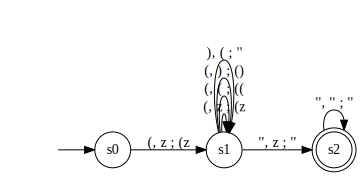

In [23]:
dotObj_pda(P2bp)

In [24]:
explore_pda("()", P2bp)

String () accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('s2', '', '')
Reached as follows:
->  ('s0', '()', 'z')
->  ('s1', ')', '(z')
->  ('s1', '', 'z')
->  ('s2', '', '') .
Final state  ('s2', '', '')
Reached as follows:
->  ('s0', '()', 'z')
->  ('s1', ')', '(z')
->  ('s1', '', 'z')
->  ('s2', '', '')
->  ('s2', '', '') .


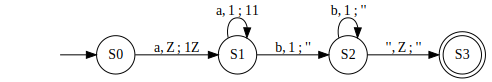

In [25]:
dotObj_pda(Pev)

In [26]:
explore_pda("ab", Pev)

String ab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'ab', 'Z')
->  ('S1', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [27]:
Pev1 = { "Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : { "S3" } }


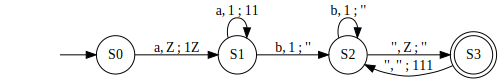

In [28]:
dotObj_pda(Pev1)

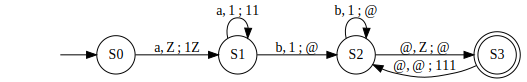

In [29]:
dotObj_pda(Pev1, visible_eps=True)

In [30]:
Pev1 = { "Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : { "S3" } }
chk_consistent_pda(Pev1)

In [31]:
explore_pda("aabb", Pev1)

String aabb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [32]:
Pev2 = {"Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : set({  }) }
chk_consistent_pda(Pev2)

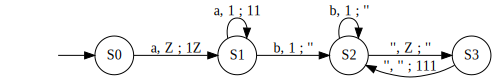

In [33]:
dotObj_pda(Pev2)

In [34]:
explore_pda("aabb", Pev2)

String aabb rejected by your PDA :-(
Visited states are:
[('S3', '', ''), ('S2', '', 'Z'), ('S2', 'b', '1Z'), ('S1', 'bb', '11Z'), ('S1', 'abb', '1Z'), ('S0', 'aabb', 'Z')]


In [35]:
explore_pda("aabb", Pev2, "ACCEPT_S")

String aabb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [36]:
Pev3 = {"Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : {"S2", "S3"} }
chk_consistent_pda(Pev3)

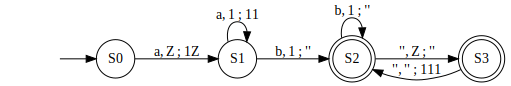

In [37]:
dotObj_pda(Pev3)

In [38]:
explore_pda("aabb", Pev3)

String aabb accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('S2', '', 'Z')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z') .
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .
Final state  ('S2', '', '111')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '')
->  ('S2', '', '111') .


In [39]:
explore_pda("aaabbb", Pev3)

String aaabbb accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('S2', '', 'Z')
Reached as follows:
->  ('S0', 'aaabbb', 'Z')
->  ('S1', 'aabbb', '1Z')
->  ('S1', 'abbb', '11Z')
->  ('S1', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z') .
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aaabbb', 'Z')
->  ('S1', 'aabbb', '1Z')
->  ('S1', 'abbb', '11Z')
->  ('S1', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .
Final state  ('S2', '', '111')
Reached as follows:
->  ('S0', 'aaabbb', 'Z')
->  ('S1', 'aabbb', '1Z')
->  ('S1', 'abbb', '11Z')
->  ('S1', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '')
->  ('S2', '', '111') .


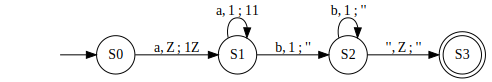

In [40]:
dotObj_pda(Pev)

In [41]:
explore_pda("aaaabbb", Pev)

String aaaabbb rejected by your PDA :-(
Visited states are:
[('S2', '', '1Z'), ('S2', 'b', '11Z'), ('S2', 'bb', '111Z'), ('S1', 'bbb', '1111Z'), ('S1', 'abbb', '111Z'), ('S1', 'aabbb', '11Z'), ('S1', 'aaabbb', '1Z'), ('S0', 'aaaabbb', 'Z')]


In [42]:
explore_pda("aaaabbbb", Pev1)

String aaaabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aaaabbbb', 'Z')
->  ('S1', 'aaabbbb', '1Z')
->  ('S1', 'aabbbb', '11Z')
->  ('S1', 'abbbb', '111Z')
->  ('S1', 'bbbb', '1111Z')
->  ('S2', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [43]:
explore_pda("aaaabbbb", Pev2)

String aaaabbbb rejected by your PDA :-(
Visited states are:
[('S3', '', ''), ('S2', '', 'Z'), ('S2', 'b', '1Z'), ('S2', 'bb', '11Z'), ('S2', 'bbb', '111Z'), ('S1', 'bbbb', '1111Z'), ('S1', 'abbbb', '111Z'), ('S1', 'aabbbb', '11Z'), ('S1', 'aaabbbb', '1Z'), ('S0', 'aaaabbbb', 'Z')]


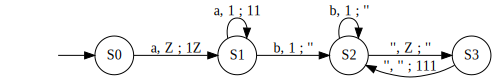

In [44]:
dotObj_pda(Pev2)

In [45]:
F27sip = {"Sigma" : {'a','b','c'},
        "Q"     : {"q1","q2","q3","q4","q5","q6","q7"},
        "Gamma" : {'a','b','c','$'},
        "Delta" : {('q1','','')  : { ('q2','$')},
                   
                   ('q2','a',''): { ('q2','a') },
                   ('q2','',''): { ('q3',''), ('q5','') },
                   
                   ('q3','b','a'): { ('q3','') },
                   ('q3','','$'): { ('q4','') },
                   
                   ('q4','c',''): { ('q4','') },
                   
                   ('q5','b',''): { ('q5','') },
                   ('q5','',''): { ('q6','') },
                   
                   ('q6','c','a'): { ('q6','') },
                   ('q6','','$'): { ('q7','') }
                  },
        "q0"    : "q1",
        "z0"    : "$",
        "F"     : {'q4','q7'} }
chk_consistent_pda(F27sip)

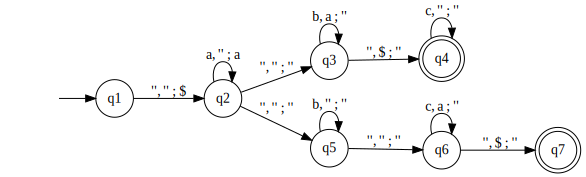

In [46]:
dotObj_pda(F27sip)

In [47]:
wwr = {"Sigma" : {'0','1'},
        "Q"     : {'q1','q2','q3','q4'},
        "Gamma" : {'0','1','$'},
        "Delta" : {('q1','',''): {('q2','$')},
                   ('q2','0',''): {('q2','0')},  
                   ('q2','1',''): {('q2','1')}, 
                   ('q2','',''): {('q3','')}, 
                   ('q3','0','0'): {('q3','')},
                   ('q3','1','1'): {('q3','')},
                   ('q3','','$') : {('q4','')}
                  },
        "q0"    : "q1",
        "z0"    : "$",
        "F"     : {'q1','q4'} }
chk_consistent_pda(wwr)

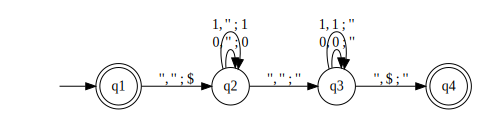

In [48]:
dotObj_pda(wwr)

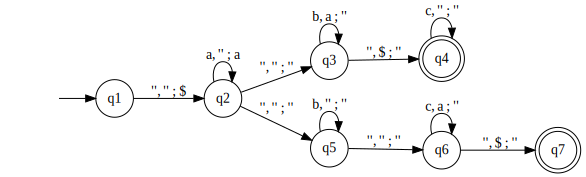

In [49]:
dotObj_pda(F27sip)

In [50]:
explore_pda("aabcc",F27sip)

String aabcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('q7', '', '$')
Reached as follows:
->  ('q1', 'aabcc', '$')
->  ('q2', 'aabcc', '$$')
->  ('q2', 'abcc', 'a$$')
->  ('q2', 'bcc', 'aa$$')
->  ('q5', 'bcc', 'aa$$')
->  ('q5', 'cc', 'aa$$')
->  ('q6', 'cc', 'aa$$')
->  ('q6', 'c', 'a$$')
->  ('q6', '', '$$')
->  ('q7', '', '$') .


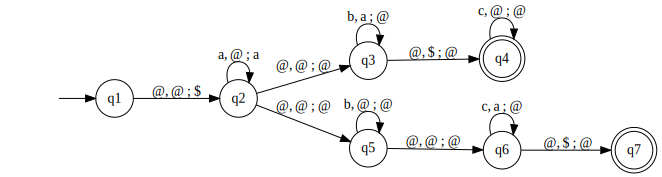

In [51]:
dotObj_pda(F27sip, visible_eps=True)

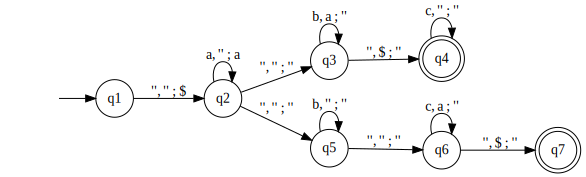

In [52]:
dotObj_pda(F27sip, visible_eps=False)

In [53]:
onestpda = {"Sigma" : {'a','b','c'},
        "Q"     : { "q7"},
        "Gamma" : { 'a','b','c','$'},
        "Delta" : { 
                   ('q7','',''): {('q7','aa')}
                  },
        "q0"    : "q7",
        "z0"    : "$",
        "F"     : set({ }) }
chk_consistent_pda(onestpda)

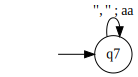

In [54]:
dotObj_pda(onestpda)

In [55]:
explore_pda("a",onestpda)

String a rejected by your PDA :-(
Visited states are:
[('q7', 'a', '$')]


In [56]:
explore_pda("aabbcc",F27sip)

String aabbcc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('q4', '', '$')
Reached as follows:
->  ('q1', 'aabbcc', '$')
->  ('q2', 'aabbcc', '$$')
->  ('q2', 'abbcc', 'a$$')
->  ('q2', 'bbcc', 'aa$$')
->  ('q3', 'bbcc', 'aa$$')
->  ('q3', 'bcc', 'a$$')
->  ('q3', 'cc', '$$')
->  ('q4', 'cc', '$')
->  ('q4', 'c', '$')
->  ('q4', '', '$') .
Final state  ('q7', '', '$')
Reached as follows:
->  ('q1', 'aabbcc', '$')
->  ('q2', 'aabbcc', '$$')
->  ('q2', 'abbcc', 'a$$')
->  ('q2', 'bbcc', 'aa$$')
->  ('q5', 'bbcc', 'aa$$')
->  ('q5', 'bcc', 'aa$$')
->  ('q5', 'cc', 'aa$$')
->  ('q6', 'cc', 'aa$$')
->  ('q6', 'c', 'a$$')
->  ('q6', '', '$$')
->  ('q7', '', '$') .


In [57]:
explore_pda("aaabbbccc",F27sip)

String aaabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('q4', '', '$')
Reached as follows:
->  ('q1', 'aaabbbccc', '$')
->  ('q2', 'aaabbbccc', '$$')
->  ('q2', 'aabbbccc', 'a$$')
->  ('q2', 'abbbccc', 'aa$$')
->  ('q2', 'bbbccc', 'aaa$$')
->  ('q3', 'bbbccc', 'aaa$$')
->  ('q3', 'bbccc', 'aa$$')
->  ('q3', 'bccc', 'a$$')
->  ('q3', 'ccc', '$$')
->  ('q4', 'ccc', '$')
->  ('q4', 'cc', '$')
->  ('q4', 'c', '$')
->  ('q4', '', '$') .
Final state  ('q7', '', '$')
Reached as follows:
->  ('q1', 'aaabbbccc', '$')
->  ('q2', 'aaabbbccc', '$$')
->  ('q2', 'aabbbccc', 'a$$')
->  ('q2', 'abbbccc', 'aa$$')
->  ('q2', 'bbbccc', 'aaa$$')
->  ('q5', 'bbbccc', 'aaa$$')
->  ('q5', 'bbccc', 'aaa$$')
->  ('q5', 'bccc', 'aaa$$')
->  ('q5', 'ccc', 'aaa$$')
->  ('q6', 'ccc', 'aaa$$')
->  ('q6', 'cc', 'aa$$')
->  ('q6', 'c', 'a$$')
->  ('q6', '', '$$')
->  ('q7', '', '$') .


In [58]:
onestpda1 = {"Sigma" : {'a','b','c'},
        "Q"     : { "q7"},
        "Gamma" : { 'a','b','c','$'},
        "Delta" : { 
                   ('q7','',''): {('q7','aa')}
                  },
        "q0"    : "q7",
        "z0"    : "$",
        "F"     : set({ }) }
chk_consistent_pda(onestpda1)

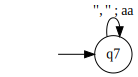

In [59]:
dotObj_pda(onestpda1)

In [60]:
explore_pda("",onestpda1, "ACCEPT_S")

String  rejected by your PDA :-(
Visited states are:
[('q7', '', '$')]


In [61]:
explore_pda("",onestpda1, "ACCEPT_S", chatty=True)

terminal_id_path =  [(('q7', '', 'aa$'), [('q7', '', '$')])]
final_id_path =  []
visited_ids =  [('q7', '', '$')]
String  rejected by your PDA :-(
Visited states are:
[('q7', '', '$')]


In [62]:
explore_pda("",onestpda1, "ACCEPT_F")

String  rejected by your PDA :-(
Visited states are:
[('q7', '', '$')]


In [63]:
run_pda("",onestpda1, "ACCEPT_S", chatty=False)

([(('q7', '', 'aa$'), [('q7', '', '$')])], [], [('q7', '', '$')])

In [64]:
run_pda("",onestpda1, "ACCEPT_S", chatty=True)

terminal_id_path =  [(('q7', '', 'aa$'), [('q7', '', '$')])]
final_id_path =  []
visited_ids =  [('q7', '', '$')]


([(('q7', '', 'aa$'), [('q7', '', '$')])], [], [('q7', '', '$')])